In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import math


In [2]:
data_path = "result/TD.csv"
data = pd.read_csv(data_path, index_col=0)

In [3]:
data

,Rank Insignia of the Islamic Revolutionary Guard Corps,Botany,Russell's teapot,I Am the Resurrection (album),Rolling hash,Brunei,The Patriotic Traitors,Nick Gillingham,Herbert M. Allison,Gordon Durie,...,Mike Junkin,Court of appeals (disambiguation),Isiro,Bishop,Now That's What I Call Music! 21,Tourism in the Isle of Man,Gauss (disambiguation),Service High School,Journal of Atmospheric and Oceanic Technology,Binary prefix
0,0,0,0,0,2,2,0,0,0,3,...,0,0,0,0,0,1,0,0,0,2
000,0,4,0,0,0,9,0,0,0,1,...,0,0,1,0,0,4,0,0,0,0
0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
006,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ḥanīfa,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
啞陳,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
文杜陵,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
沙胡重,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = StandardScaler().fit_transform(data.values).T

In [6]:
X.shape

(50, 13345)

In [7]:
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.13720942, 0.06751938])

In [29]:
sklearn_pca.explained_variance_ratio_.sum()

0.20472879478469208

In [8]:
sklearn_pca.components_

array([[ 0.00145423,  0.00146111,  0.00019355, ..., -0.00028568,
        -0.00028568, -0.00028568],
       [-0.00543118,  0.00034027,  0.00044265, ...,  0.00030148,
         0.00030148,  0.00030148]])

In [35]:
Y_sklearn.shape

(50, 2)

In [11]:
label = data.columns.to_list()
label = list(map(lambda x: " ".join(x.split()[:2]) + "...", label))
label

['Rank Insignia...',
 'Botany...',
 "Russell's teapot...",
 'I Am...',
 'Rolling hash...',
 'Brunei...',
 'The Patriotic...',
 'Nick Gillingham...',
 'Herbert M....',
 'Gordon Durie...',
 'I Vampiri...',
 'Rail transport...',
 'WWF WrestleMania...',
 'Jun of...',
 'HNoMS Ørnen...',
 'John Shoop...',
 'Nuria Olivé...',
 'Emergence (Star...',
 'There Are...',
 'Lake Mountain...',
 'Variable darner...',
 'Patricia Davidson...',
 'Alison Newman...',
 'Binary function...',
 'Arthur W....',
 'H.E.A.R....',
 'Claude Alvares...',
 'Embrace (novel)...',
 'Reed frog...',
 'Alfonso III...',
 'List of...',
 'Brit milah...',
 'Adrian Lamo...',
 'Aomori Curling...',
 'Rotary vane...',
 'Red Water...',
 'Lory (disambiguation)...',
 'Ernest C....',
 'Avionics...',
 'Hindi cinema...',
 'Mike Junkin...',
 'Court of...',
 'Isiro...',
 'Bishop...',
 "Now That's...",
 'Tourism in...',
 'Gauss (disambiguation)...',
 'Service High...',
 'Journal of...',
 'Binary prefix...']

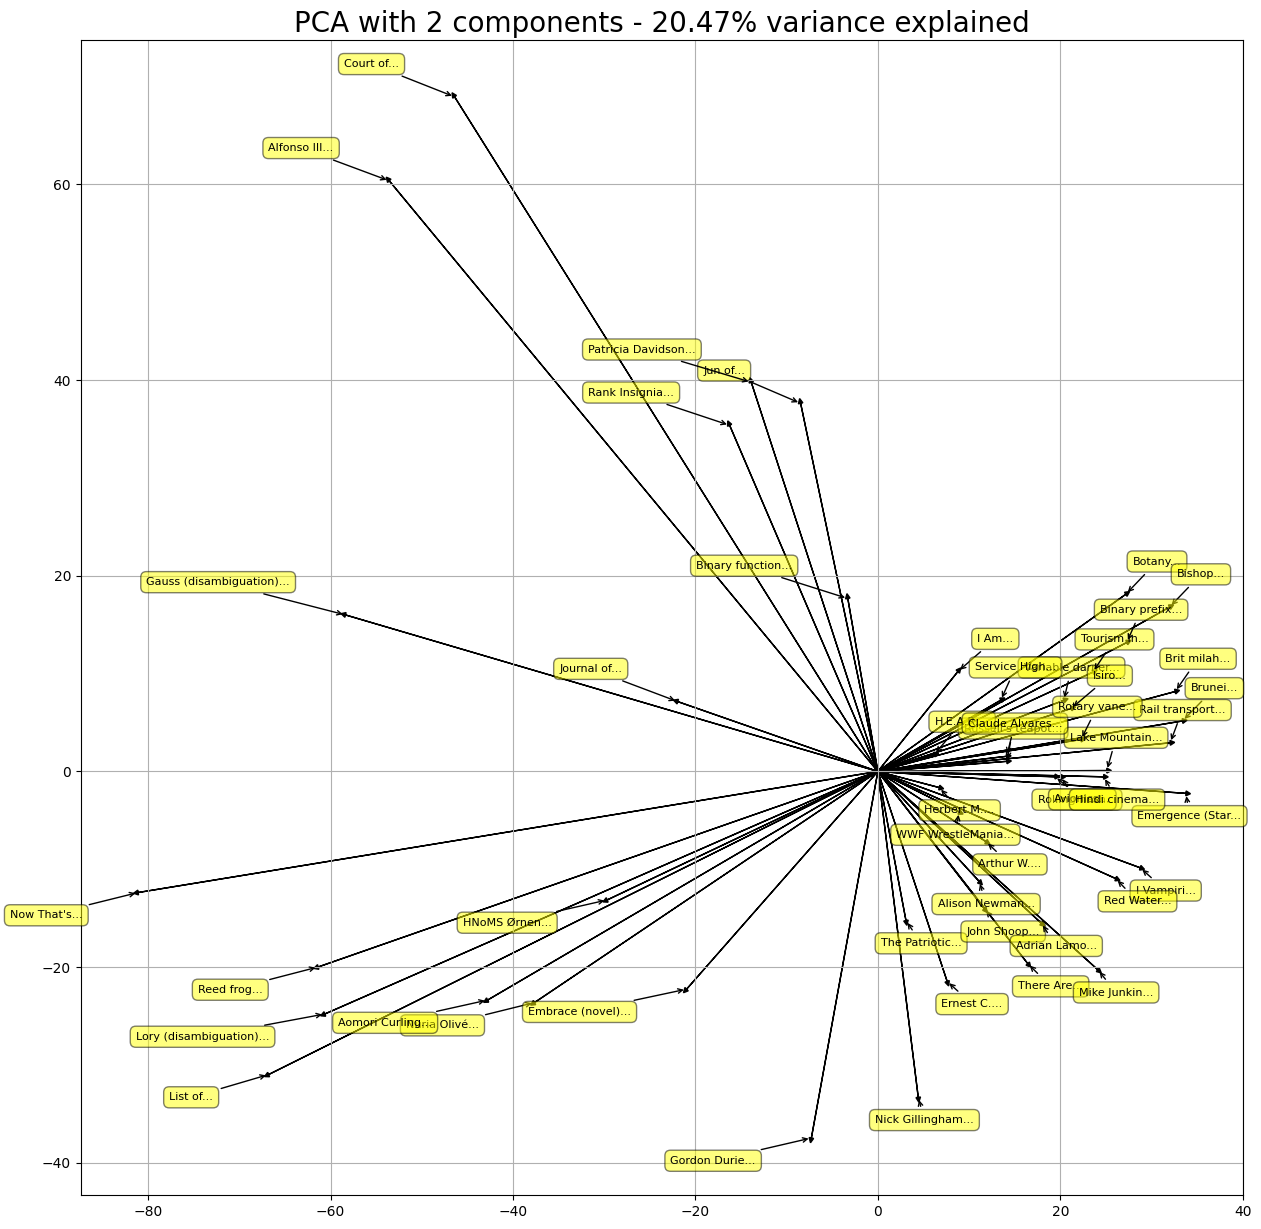

In [34]:
plt.figure(figsize=(15, 15))

for text, x, y in zip(label, Y_sklearn[:, 0], Y_sklearn[:, 1]):
    plt.annotate(
        text,
        xy=(x, y), xytext=(math.copysign(40, x), math.copysign(20, y)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        fontsize=8
    )
    plt.arrow(0, 0, x, y, head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.grid()
plt.title(f"PCA with 2 components - {sklearn_pca.explained_variance_ratio_.sum() * 100:.2f}% variance explained", fontsize=20)
plt.show()
